In [1]:
import torch
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

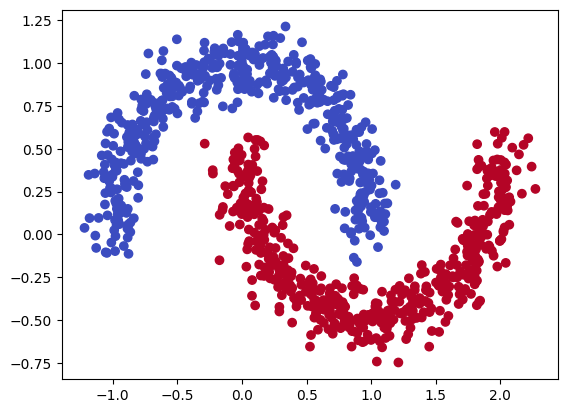

In [2]:
x, y  = make_moons(n_samples=1000, noise=0.1, random_state=42)  # 두개의 반원모양의 데이터를 생성
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.coolwarm)
plt.show()

In [3]:
# 이상치 데이터 설정
outliers_ratio = 0.1  # 이상치 비율
n_outliers = int(outliers_ratio * len(x))
n_inliers = len(x) - n_outliers


rng = np.random.RandomState(42)
x_outliers = 1.5 * rng.uniform(low=-1, high=3, size=(n_outliers, 2)) # 이상치 데이터 생성
x = np.vstack([x, x_outliers])  # 이상치 데이터를 기존 데이터에 추가
y = np.hstack([y, -1*np.ones(n_outliers)]) # 이상치 데이터는 -1로 지정

1000
1100


In [9]:
# 데이터 정규화
x = (x - x.mean(axis=0)) / x.std(axis=0)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# 모델 학습
model = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
model.fit(x_train)

# 이상 탐지
y_pred = model.predict(x_test)
y_pred = np.where(y_pred == 1, 0, y_pred) # 1을 0으로 -1을 1로 변환
score = f1_score(y_test, y_pred, average='macro')

# F1 스코어 : 0부터 1까지 값을 가지고 1에 가까우면 좋은 모델
print('f1 score: ',score)

f1 score:  0.3745980707395498


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


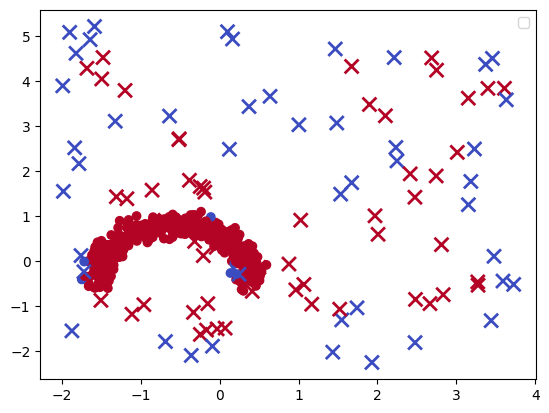

In [12]:
y_pred_all = model.predict(X)

 

# 이상치 데이터와 정상 데이터를 분리하여 시각화
x_inliers = x[y == 0]
x_outliers = x[y == -1]
y_pred_inliers = y_pred_all[y == 0]
y_pred_outliers = y_pred_all[y == -1]

 

plt.scatter(x_inliers[:, 0], x_inliers[:, 1], c=y_pred_inliers, cmap=plt.cm.coolwarm)
plt.scatter(x_outliers[:, 0], x_outliers[:, 1], c=y_pred_outliers, cmap=plt.cm.coolwarm, marker='x', 
            s=100, linewidth=2)
plt.show()